# **Importing Libraries**


1.   **pandas** (pd) is used for data handling and manipulation using DataFrames.
2.   **numpy** (np) provides support for numerical operations and arrays.
3.   **matplotlib.pyplot** (plt) and seaborn (sns) are for creating visualizations.
4.   **sklearn** provides various tools for machine learning, including model selection, preprocessing, and model evaluation.

# **Loading and Initial Data Exploration**


*   The code first loads a dataset from a CSV file named 'telecom_customer_churn.csv' into a pandas DataFrame called df.
*   It then displays the first 5 rows of the DataFrame using df.head() to give a glimpse of the data.
*   The df.info() function is used to print a summary of the DataFrame, including data types and missing values.

# **Data Cleaning and Preprocessing**
* **Dropping Irrelevant Columns:** Columns deemed irrelevant for churn prediction (e.g., 'Customer ID', 'City') are removed from the DataFrame using df.drop().
* **Filtering Customers:** The data is filtered to include only customers with 'Stayed' or 'Churned' status using df['Customer Status'].isin().
* **Handling Missing Values:** Missing values in specific columns are filled using df.fillna(). Categorical columns like 'Offer' and 'Internet Type' are filled with 'None', while numerical columns like 'Avg Monthly Long Distance Charges' are filled with the median value.
* **Label Encoding:** Categorical features (columns with text data) are converted into numerical representations using LabelEncoder from sklearn.preprocessing. This is necessary for many machine learning algorithms that work primarily with numerical data.

# **Feature Selection and Splitting Data**
* **Feature Selection:** The code selects the features (X) and the target variable (y). In this case, 'Customer Status' is the target, and all other columns are features.
* **Train-Test Split:** The data is split into training and testing sets using train_test_split from sklearn.model_selection. 80% of the data is used for training (X_train, y_train) and 20% for testing (X_test, y_test). The random_state ensures reproducibility.

# **Feature Scaling**
* **Feature Scaling:** The features are scaled using StandardScaler from sklearn.preprocessing. This ensures that all features have a similar range of values, which can improve the performance of some machine learning algorithms.

# Model Building, Training, and Evaluation
* **Model Building:** Three different classification models (Logistic Regression, Decision Tree, and Random Forest) are initialized.
* **Training and Evaluation:** The code iterates through each model, trains it on the training data (X_train, y_train), and makes predictions on the test data (X_test).
* **Evaluation Metrics: **The performance of each model is evaluated using metrics like accuracy, classification report (precision, recall, F1-score), and a confusion matrix. These metrics provide insights into how well the model is predicting customer churn. The confusion matrix is visualized using a heatmap

Saving telecom_customer_churn.csv to telecom_customer_churn (2).csv

First 5 rows:
   Customer ID  Gender  Age Married  Number of Dependents          City  \
0  0002-ORFBO  Female   37     Yes                     0  Frazier Park   
1  0003-MKNFE    Male   46      No                     0      Glendale   
2  0004-TLHLJ    Male   50      No                     0    Costa Mesa   
3  0011-IGKFF    Male   78     Yes                     0      Martinez   
4  0013-EXCHZ  Female   75     Yes                     0     Camarillo   

   Zip Code   Latitude   Longitude  Number of Referrals  ...   Payment Method  \
0     93225  34.827662 -118.999073                    2  ...      Credit Card   
1     91206  34.162515 -118.203869                    0  ...      Credit Card   
2     92627  33.645672 -117.922613                    0  ...  Bank Withdrawal   
3     94553  38.014457 -122.115432                    1  ...  Bank Withdrawal   
4     93010  34.227846 -119.079903                    3  ...      

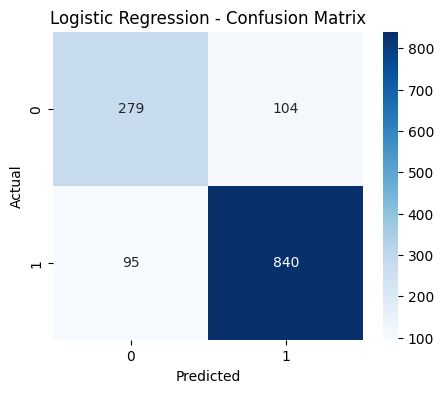



----- Decision Tree -----
Accuracy: 0.8232169954476479
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.69      0.70       383
           1       0.88      0.88      0.88       935

    accuracy                           0.82      1318
   macro avg       0.79      0.79      0.79      1318
weighted avg       0.82      0.82      0.82      1318



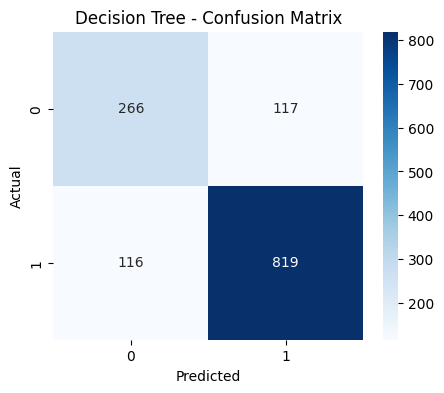



----- Random Forest -----
Accuracy: 0.8649468892261002
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.66      0.74       383
           1       0.87      0.95      0.91       935

    accuracy                           0.86      1318
   macro avg       0.86      0.80      0.82      1318
weighted avg       0.86      0.86      0.86      1318



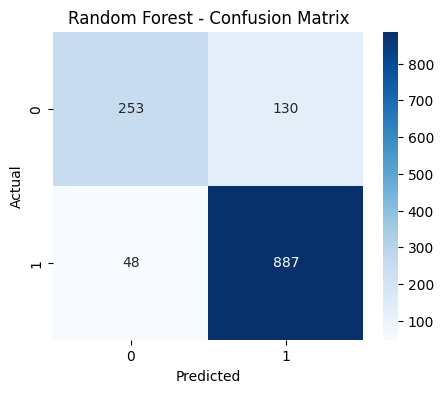

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load Data
#df = pd.read_csv('/mnt/data/telecom_customer_churn.csv')  # Update path if neede
# 1. Upload CSV
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')))

# 2. Basic Info
print("\nFirst 5 rows:\n", df.head())
print("\nData Info:\n")
print(df.info())

# 3. Drop irrelevant columns
df.drop(['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason'], axis=1, inplace=True)

# 4. Filter only 'Stayed' and 'Churned' customers
df = df[df['Customer Status'].isin(['Stayed', 'Churned'])]

# 5. Handle missing values (corrected way)
df.fillna({
    'Offer': 'None',
    'Internet Type': 'None',
    'Avg Monthly Long Distance Charges': df['Avg Monthly Long Distance Charges'].median(),
    'Avg Monthly GB Download': df['Avg Monthly GB Download'].median()
}, inplace=True)

# 6. Label Encoding for categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# 7. Feature Selection
X = df.drop('Customer Status', axis=1)
y = df['Customer Status']

# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 10. Build Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# 11. Train and Evaluate Models
for name, model in models.items():
    print(f"\n\n----- {name} -----")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()